# 1-D Tight Binding Model

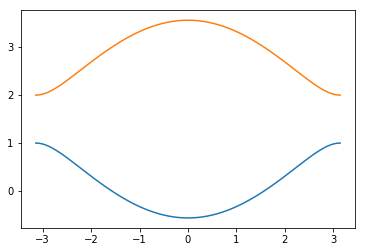

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

v_a = 1
v_b = 2
t = 1
a = 1
bz = np.pi / a
    
def calculate(k):
    h_k = np.matrix([[v_a, -2*t*np.cos(k*a/2)],
                     [-2*t*np.cos(k*a/2), v_b]])
    e_k = np.linalg.eigvals(h_k);
    return e_k

k = np.linspace(-bz, bz, 100)
e = list(map(calculate, k))
plt.plot(k, e);

In [55]:
v_0 = 1
a = 1

def calculate(k):
    h_k = np.matrix([[v_0, -2*t*np.cos(k*a), 0],
                     [-2*t*np.cos(k*a), v_0, -2*t*np.cos(k*a/2)],
                     [0, -2*t*np.cos(k*a/2), v_0]])
    e_k = np.linalg.eigvals(h_k);
    return e_k

k = np.linspace(-bz, bz, 100)
e = np.array(list(map(calculate, k)))

In [72]:
import pandas as pd
bands = pd.DataFrame(e).apply(np.sort, axis=1)

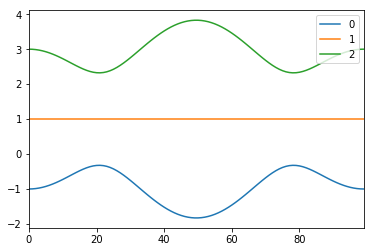

In [74]:
bands.plot();

## Graphene Unit Cell

In [178]:
np.pi / foo

array([ 3.14159265,  1.57079633])

In [180]:
a = 1
v_0 = 0
t = 1

a_1 = a/2 * np.array((3, np.sqrt(3)))
a_2 = a/2 * np.array((3, -np.sqrt(3)))

d_1 = a * np.array((-1, 0))
d_2 = a * np.array((1, np.sqrt(3)))
d_3 = a * np.array((1, -np.sqrt(3)))

b_1 = 2*np.pi / a_1
b_2 = 2*np.pi / a_2

def hop(k, a):
    return -t * np.exp(1j * np.dot(k, a))
    
def hop_conj(k, a):
    return -t * np.exp(-1j * np.dot(k, a))

def hamiltonian(k): 
    return np.matrix([[v_0,  hop(k, d_1) + hop(k, d_2) + hop(k, d_3)],
                      [hop_conj(k, d_1) + hop_conj(k, d_2) + hop_conj(k, d_3), v_0]])

def energy(k):
    h = hamiltonian(k)
    return np.real(np.linalg.eigvals(h))

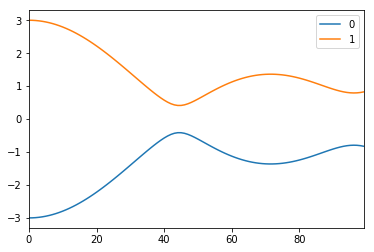

In [181]:
k = np.column_stack((np.linspace(0, b_1, 100), np.linspace(0, b_, 100)))
bands = pd.DataFrame(list(map(energy, k))).apply(np.sort, axis=1)
bands.plot()